In [1]:
import pandas as pd
import numpy as np 

df= pd.read_csv('zillow_all_cities_20250906_225706.csv')

In [5]:
df.head(10)

,bathrooms,bedrooms,ciphotosty,comingSoonOnMarketDate,country,currency,datePriceChanged,daysOnZillow,homeStatus,homeStatusForHDP,...,rentZestimate,shouldHighlight,state,streetAddress,taxAssessedValue,timeOnZillow,unit,zestimate,zipcode,zpid
0,4.0,4.0,"houston, tx",NaN,USA,USD,1.756883e+12,-1,FOR_SALE,FOR_SALE,...,3233.0,False,TX,13910 Inland Spring Ct,414447.0,1470972000,NaN,395200.0,77059,28508989
1,3.0,5.0,"houston, tx",NaN,USA,USD,1.756278e+12,-1,FOR_SALE,FOR_SALE,...,2803.0,False,TX,8107 Richland Dr,365710.0,3213491000,NaN,380300.0,77028,27937632
2,3.0,4.0,"houston, tx",NaN,USA,USD,1.756192e+12,-1,FOR_SALE,FOR_SALE,...,2190.0,False,TX,12406 Mill Lane Dr,303873.0,4683494000,NaN,258200.0,77070,28377163
3,3.0,5.0,"houston, tx",NaN,USA,USD,NaN,-1,FOR_SALE,FOR_SALE,...,3030.0,False,TX,5610 Charlestown Colony Dr,385522.0,2591760000,NaN,393100.0,77084,28493833
4,4.0,4.0,"houston, tx",NaN,USA,USD,NaN,-1,FOR_SALE,FOR_SALE,...,3461.0,False,TX,15406 Dawn Meadows Dr,484827.0,695721000,NaN,428500.0,77068,28418953
5,3.0,4.0,"houston, tx",NaN,USA,USD,NaN,-1,FOR_SALE,FOR_SALE,...,2109.0,False,TX,3834 Gladeridge Dr,277130.0,3214897000,NaN,307300.0,77068,28168765
6,3.0,5.0,"houston, tx",NaN,USA,USD,1.753513e+12,-1,FOR_SALE,FOR_SALE,...,2905.0,False,TX,4306 Lake Cypress Cir,353169.0,1452242000,NaN,400200.0,77068,124873486
7,3.0,4.0,"houston, tx",NaN,USA,USD,NaN,-1,FOR_SALE,FOR_SALE,...,2655.0,False,TX,6519 Utah St,12000.0,7076028000,NaN,227900.0,77091,160217130
8,2.0,3.0,"houston, tx",NaN,USA,USD,NaN,-1,FOR_SALE,FOR_SALE,...,1503.0,False,TX,12227 W Village Dr UNIT C,123859.0,1978381000,Unit C,96500.0,77039,28207875
9,3.0,3.0,"houston, tx",NaN,USA,USD,NaN,-1,FOR_SALE,FOR_SALE,...,NaN,False,TX,7970 Fowlie St,NaN,5024076000,NaN,227400.0,77028,454275513


In [4]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    print(f"{col}: {null_count} null values")

bathrooms: 0 null values
bedrooms: 0 null values
ciphotosty: 0 null values
comingSoonOnMarketDate: 408 null values
country: 0 null values
currency: 0 null values
datePriceChanged: 368 null values
daysOnZillow: 0 null values
homeStatus: 0 null values
homeStatusForHDP: 0 null values
homeType: 0 null values
imgSrc: 0 null values
isFeatured: 0 null values
isNonOwnerOccupied: 0 null values
isPreforeclosureAuction: 0 null values
isPremierBuilder: 0 null values
isShowcaseListing: 0 null values
isUnmappable: 0 null values
isZillowOwned: 0 null values
latitude: 0 null values
listing_sub_type: 0 null values
livingArea: 7 null values
longitude: 0 null values
lotAreaUnit: 65 null values
lotAreaValue: 65 null values
newConstructionType: 394 null values
openHouse: 278 null values
open_house_info: 278 null values
price: 0 null values
priceChange: 368 null values
priceForHDP: 0 null values
priceReduction: 376 null values
rentZestimate: 172 null values
shouldHighlight: 0 null values
state: 0 null value

In [9]:
null_counts = df.isnull().sum()
cols_to_drop = null_counts[null_counts > 170].index

df_cleaned = df.drop(columns=cols_to_drop)

print("Dropped columns:", cols_to_drop.tolist())
print("Remaining columns:", df_cleaned.columns.tolist())

Dropped columns: ['comingSoonOnMarketDate', 'datePriceChanged', 'newConstructionType', 'openHouse', 'open_house_info', 'priceChange', 'priceReduction', 'rentZestimate', 'unit', 'zestimate']
Remaining columns: ['bathrooms', 'bedrooms', 'ciphotosty', 'country', 'currency', 'daysOnZillow', 'homeStatus', 'homeStatusForHDP', 'homeType', 'imgSrc', 'isFeatured', 'isNonOwnerOccupied', 'isPreforeclosureAuction', 'isPremierBuilder', 'isShowcaseListing', 'isUnmappable', 'isZillowOwned', 'latitude', 'listing_sub_type', 'livingArea', 'longitude', 'lotAreaUnit', 'lotAreaValue', 'price', 'priceForHDP', 'shouldHighlight', 'state', 'streetAddress', 'taxAssessedValue', 'timeOnZillow', 'zipcode', 'zpid']


In [10]:
df_cleaned.head(10)

,bathrooms,bedrooms,ciphotosty,country,currency,daysOnZillow,homeStatus,homeStatusForHDP,homeType,imgSrc,...,lotAreaValue,price,priceForHDP,shouldHighlight,state,streetAddress,taxAssessedValue,timeOnZillow,zipcode,zpid
0,4.0,4.0,"houston, tx",USA,USD,-1,FOR_SALE,FOR_SALE,SINGLE_FAMILY,https://.zillowstatic.com/fp/820ff9869c40c3b12...,...,7853.8680,400000.0,400000.0,False,TX,13910 Inland Spring Ct,414447.0,1470972000,77059,28508989
1,3.0,5.0,"houston, tx",USA,USD,-1,FOR_SALE,FOR_SALE,SINGLE_FAMILY,https://photos.zillowstatic.com/fp/0828aa773f1...,...,6242.1480,382000.0,382000.0,False,TX,8107 Richland Dr,365710.0,3213491000,77028,27937632
2,3.0,4.0,"houston, tx",USA,USD,-1,FOR_SALE,FOR_SALE,SINGLE_FAMILY,https://photos.zillowstatic.com/fp/2c20f27702d...,...,7801.5960,260000.0,260000.0,False,TX,12406 Mill Lane Dr,303873.0,4683494000,77070,28377163
3,3.0,5.0,"houston, tx",USA,USD,-1,FOR_SALE,FOR_SALE,SINGLE_FAMILY,https://photos.zillowstatic.com/fp/daf5863666e...,...,7365.9960,399000.0,399000.0,False,TX,5610 Charlestown Colony Dr,385522.0,2591760000,77084,28493833
4,4.0,4.0,"houston, tx",USA,USD,-1,FOR_SALE,FOR_SALE,SINGLE_FAMILY,https://photos.zillowstatic.com/fp/d93158821f4...,...,8062.9560,439000.0,439000.0,False,TX,15406 Dawn Meadows Dr,484827.0,695721000,77068,28418953
5,3.0,4.0,"houston, tx",USA,USD,-1,FOR_SALE,FOR_SALE,SINGLE_FAMILY,https://photos.zillowstatic.com/fp/9bfeb00fe52...,...,9317.4840,315950.0,315950.0,False,TX,3834 Gladeridge Dr,277130.0,3214897000,77068,28168765
6,3.0,5.0,"houston, tx",USA,USD,-1,FOR_SALE,FOR_SALE,SINGLE_FAMILY,https://photos.zillowstatic.com/fp/8e795025aee...,...,0.2554,409379.0,409379.0,False,TX,4306 Lake Cypress Cir,353169.0,1452242000,77068,124873486
7,3.0,4.0,"houston, tx",USA,USD,-1,FOR_SALE,FOR_SALE,SINGLE_FAMILY,https://photos.zillowstatic.com/fp/1a112cccb3e...,...,5998.2120,228000.0,228000.0,False,TX,6519 Utah St,12000.0,7076028000,77091,160217130
8,2.0,3.0,"houston, tx",USA,USD,-1,FOR_SALE,FOR_SALE,TOWNHOUSE,https://photos.zillowstatic.com/fp/fc13b419dab...,...,2086.5240,100000.0,100000.0,False,TX,12227 W Village Dr UNIT C,123859.0,1978381000,77039,28207875
9,3.0,3.0,"houston, tx",USA,USD,-1,FOR_SALE,FOR_SALE,SINGLE_FAMILY,https://photos.zillowstatic.com/fp/cea3356e248...,...,4199.1840,228000.0,228000.0,False,TX,7970 Fowlie St,NaN,5024076000,77028,454275513


In [11]:
for col in df_cleaned.columns:
    null_count = df[col].isnull().sum()
    print(f"{col}: {null_count} null values")

bathrooms: 0 null values
bedrooms: 0 null values
ciphotosty: 0 null values
country: 0 null values
currency: 0 null values
daysOnZillow: 0 null values
homeStatus: 0 null values
homeStatusForHDP: 0 null values
homeType: 0 null values
imgSrc: 0 null values
isFeatured: 0 null values
isNonOwnerOccupied: 0 null values
isPreforeclosureAuction: 0 null values
isPremierBuilder: 0 null values
isShowcaseListing: 0 null values
isUnmappable: 0 null values
isZillowOwned: 0 null values
latitude: 0 null values
listing_sub_type: 0 null values
livingArea: 7 null values
longitude: 0 null values
lotAreaUnit: 65 null values
lotAreaValue: 65 null values
price: 0 null values
priceForHDP: 0 null values
shouldHighlight: 0 null values
state: 0 null values
streetAddress: 0 null values
taxAssessedValue: 48 null values
timeOnZillow: 0 null values
zipcode: 0 null values
zpid: 0 null values


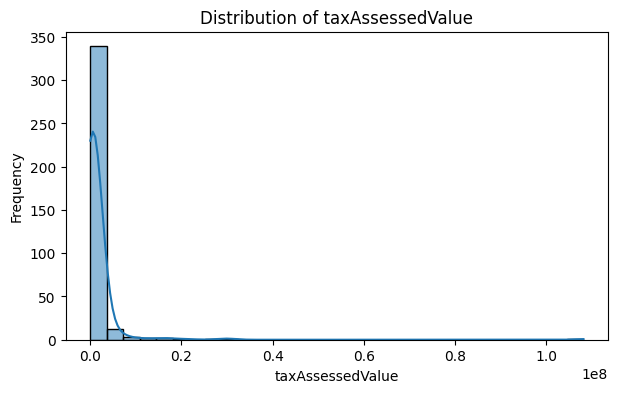

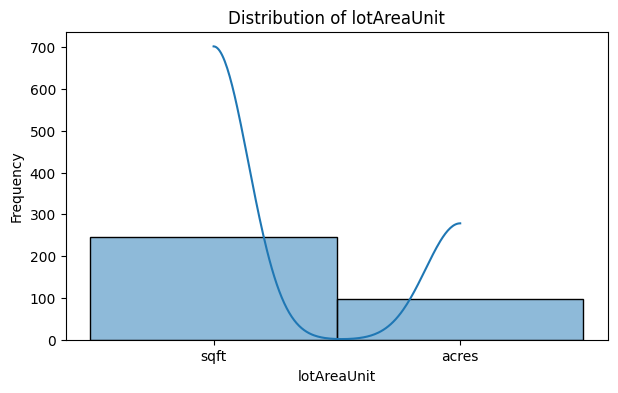

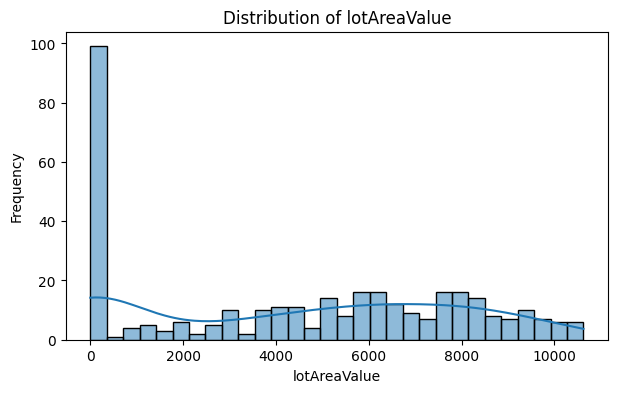

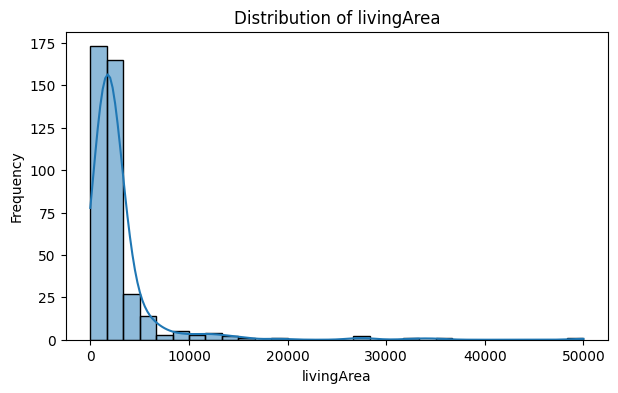

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = df_cleaned


cols = ["taxAssessedValue", "lotAreaUnit", "lotAreaValue", "livingArea"]

for col in cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [15]:
df["taxAssessedValue"].fillna(df["taxAssessedValue"].median(), inplace=True)

C:\Users\kaman\AppData\Local\Temp\ipykernel_10540\2170049973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["taxAssessedValue"].fillna(df["taxAssessedValue"].median(), inplace=True)


In [16]:
df["lotAreaUnit"].fillna(df["lotAreaUnit"].mode()[0], inplace=True)

C:\Users\kaman\AppData\Local\Temp\ipykernel_10540\1596764231.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["lotAreaUnit"].fillna(df["lotAreaUnit"].mode()[0], inplace=True)


In [17]:
df["lotAreaValue"].fillna(df["lotAreaValue"].mean(), inplace=True)

C:\Users\kaman\AppData\Local\Temp\ipykernel_10540\1095999608.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["lotAreaValue"].fillna(df["lotAreaValue"].mean(), inplace=True)


In [18]:
df["livingArea"].fillna(df["livingArea"].median(), inplace=True)

C:\Users\kaman\AppData\Local\Temp\ipykernel_10540\2324505639.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["livingArea"].fillna(df["livingArea"].median(), inplace=True)


In [19]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    print(f"{col}: {null_count} null values")

bathrooms: 0 null values
bedrooms: 0 null values
ciphotosty: 0 null values
country: 0 null values
currency: 0 null values
daysOnZillow: 0 null values
homeStatus: 0 null values
homeStatusForHDP: 0 null values
homeType: 0 null values
imgSrc: 0 null values
isFeatured: 0 null values
isNonOwnerOccupied: 0 null values
isPreforeclosureAuction: 0 null values
isPremierBuilder: 0 null values
isShowcaseListing: 0 null values
isUnmappable: 0 null values
isZillowOwned: 0 null values
latitude: 0 null values
listing_sub_type: 0 null values
livingArea: 0 null values
longitude: 0 null values
lotAreaUnit: 0 null values
lotAreaValue: 0 null values
price: 0 null values
priceForHDP: 0 null values
shouldHighlight: 0 null values
state: 0 null values
streetAddress: 0 null values
taxAssessedValue: 0 null values
timeOnZillow: 0 null values
zipcode: 0 null values
zpid: 0 null values


In [21]:
df.shape

(410, 32)